In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 40.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from datasets import load_dataset
cifar10_ds = load_dataset("cifar10")

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [4]:
!pip install contrastive

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 58.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 41.9 MB/s eta 0:00:00:00:0100:01
  Created wheel for contrastive: filename=contrastive-1.2.0-py3-none-any.whl size=6899 sha256=2cb619292255e6c6ee5ecb532e744f0bc06a714d24ba2d328efd8e279775e4ac
  Stored in directory: /root/.ca

In [5]:
print(cifar10_ds)

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})


In [21]:
from sklearn.decomposition import PCA
import numpy as np

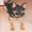

5

In [18]:
index = 10
cifar10_ds['train'][index]['img'].show()
cifar10_ds['train'][index]['img'].size
cifar10_ds['train'][index]['label']

In [24]:
np.asarray(cifar10_ds['train'][index]['img']).flatten().shape

(3072,)

In [36]:
import random

### Demo Quickstart

In [86]:
X_target = list()
X_label = list()
X_background = list()
TARGET_LABEL_LIST = [0,1]
for i in random.sample(range(10000),2000):
    label = cifar10_ds['train'][i]['label']
    img_flat = np.asarray(cifar10_ds['train'][i]['img']).flatten()
    if label in TARGET_LABEL_LIST:
        X_target.append(img_flat)
        X_label.append(label)
    else:
        X_background.append(img_flat)

X_target = np.asarray(X_target)
X_label = np.asarray(X_label)
X_background = np.asarray(X_background)

print(X_target.shape)
print(X_label.shape)
print(X_background.shape)

(416, 3072)
(416,)
(1584, 3072)


In [87]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_target)
print(X_pca.shape)

(416, 2)


In [98]:
from contrastive import CPCA

cpca = CPCA()
X_cpca = cpca.fit_transform(X_target[:,:], X_background[:,:])

In [105]:
X_cpca = np.real(np.asarray(X_cpca))
print(X_cpca.shape)

(4, 416, 2)


In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_pca, X_label, cv=5)
print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")

Accuracy: 0.661 +/- 0.037


In [108]:
X_cpca[0].shape

(416, 2)

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

for i in range(4):
    knn = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn, X_cpca[i], X_label, cv=5)
    print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")

Accuracy: 0.647 +/- 0.039
Accuracy: 0.589 +/- 0.04
Accuracy: 0.608 +/- 0.063
Accuracy: 0.5 +/- 0.07


In [ ]:
results_list = list()

for i in range(10):
    for j in range(10):
        tmp_dict = {
            'no_preprocessing':None,
            'PCA':None,
            'cPCA-0':None,
            'cPCA-1':None,
            'cPCA-2':None,
            'cPCA-3':None,
            'name':f"{i} AND {j}"
        }
        X_target = list()
        X_label = list()
        X_background = list()
        if i>j:
            TARGET_LABEL_LIST = [i,j]
            for l in random.sample(range(10000),2000):
                label = cifar10_ds['train'][l]['label']
                img_flat = np.asarray(cifar10_ds['train'][l]['img']).flatten()
                if label in TARGET_LABEL_LIST:
                    X_target.append(img_flat)
                    X_label.append(label)
                else:
                    X_background.append(img_flat)
            X_target = np.asarray(X_target)
            X_label = np.asarray(X_label)
            X_background = np.asarray(X_background)
            print("sample complete")
            print(f"label: {TARGET_LABEL_LIST}")
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X_target)
            print(X_pca.shape)
            print("PCA complete")
            cpca = CPCA()
            X_cpca = cpca.fit_transform(X_target[:,:], X_background[:,:])
            X_cpca = np.real(X_cpca)
            print("CPCA complete")
            print("No preprocessing score")
            knn = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(knn, X_target, X_label, cv=5)
            print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")
            tmp_dict['no_preprocessing']=f"{round(np.mean(scores),3)} +/- {round(np.std(scores),3)}"
            print("PCA scores")
            knn = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(knn, X_pca, X_label, cv=5)
            print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")
            tmp_dict['PCA']=f"{round(np.mean(scores),3)} +/- {round(np.std(scores),3)}"
            print("cPCA scores")
            for k in range(4):
                knn = KNeighborsClassifier(n_neighbors=5)
                scores = cross_val_score(knn, X_cpca[k], X_label, cv=5)
                print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")
                tmp_dict['cPCA-'+str(k)]=f"{round(np.mean(scores),3)} +/- {round(np.std(scores),3)}"
            print()
            results_list.append(tmp_dict)
            # raise KeyError

In [156]:
import pandas as pd
df = pd.DataFrame(results_list)
df

,no_preprocessing,PCA,cPCA-0,cPCA-1,cPCA-2,cPCA-3,name
0,0.598 +/- 0.038,0.593 +/- 0.028,0.593 +/- 0.029,0.575 +/- 0.052,0.555 +/- 0.05,0.638 +/- 0.035,1 AND 0
1,0.748 +/- 0.035,0.6 +/- 0.034,0.642 +/- 0.028,0.541 +/- 0.033,0.472 +/- 0.039,0.479 +/- 0.044,2 AND 0
2,0.597 +/- 0.026,0.548 +/- 0.029,0.558 +/- 0.027,0.658 +/- 0.075,0.619 +/- 0.042,0.555 +/- 0.046,2 AND 1
3,0.751 +/- 0.012,0.627 +/- 0.035,0.614 +/- 0.014,0.738 +/- 0.039,0.492 +/- 0.022,0.539 +/- 0.068,3 AND 0
4,0.7 +/- 0.024,0.592 +/- 0.036,0.602 +/- 0.044,0.658 +/- 0.053,0.645 +/- 0.052,0.5 +/- 0.034,3 AND 1
5,0.62 +/- 0.045,0.577 +/- 0.038,0.605 +/- 0.07,0.527 +/- 0.021,0.562 +/- 0.043,0.491 +/- 0.045,3 AND 2
6,0.781 +/- 0.026,0.715 +/- 0.036,0.722 +/- 0.065,0.695 +/- 0.061,0.519 +/- 0.041,0.548 +/- 0.051,4 AND 0
7,0.611 +/- 0.015,0.584 +/- 0.034,0.579 +/- 0.053,0.661 +/- 0.054,0.583 +/- 0.037,0.566 +/- 0.037,4 AND 1
8,0.559 +/- 0.022,0.536 +/- 0.034,0.502 +/- 0.064,0.536 +/- 0.05,0.513 +/- 0.031,0.472 +/- 0.056,4 AND 2
9,0.607 +/- 0.028,0.52 +/- 0.065,0.537 +/- 0.066,0.617 +/- 0.066,0.52 +/- 0.041,0.49 +/- 0.052,4 AND 3


In [157]:
def color_format(s):
    original_acc = get_acc(s['no_preprocessing'])
    # print(original_acc)
    is_max = s == s.max()
    color_list = []
    for i in s:
        # print(f'hi: {i}')
        if get_acc(i) <= original_acc:
            color_list.append('background-color: white')
        else:
            color_list.append('background-color: rgb(100,255,100)')
    return color_list

def get_acc(x):
    return float(x.split('+/-')[0].strip())
# results_df = pd.DataFrame(results_list)
df.set_index("name", inplace=True)
df.style.apply(color_format, axis=1)

,no_preprocessing,PCA,cPCA-0,cPCA-1,cPCA-2,cPCA-3
name,,,,,,
1 AND 0,0.598 +/- 0.038,0.593 +/- 0.028,0.593 +/- 0.029,0.575 +/- 0.052,0.555 +/- 0.05,0.638 +/- 0.035
2 AND 0,0.748 +/- 0.035,0.6 +/- 0.034,0.642 +/- 0.028,0.541 +/- 0.033,0.472 +/- 0.039,0.479 +/- 0.044
2 AND 1,0.597 +/- 0.026,0.548 +/- 0.029,0.558 +/- 0.027,0.658 +/- 0.075,0.619 +/- 0.042,0.555 +/- 0.046
3 AND 0,0.751 +/- 0.012,0.627 +/- 0.035,0.614 +/- 0.014,0.738 +/- 0.039,0.492 +/- 0.022,0.539 +/- 0.068
3 AND 1,0.7 +/- 0.024,0.592 +/- 0.036,0.602 +/- 0.044,0.658 +/- 0.053,0.645 +/- 0.052,0.5 +/- 0.034
3 AND 2,0.62 +/- 0.045,0.577 +/- 0.038,0.605 +/- 0.07,0.527 +/- 0.021,0.562 +/- 0.043,0.491 +/- 0.045
4 AND 0,0.781 +/- 0.026,0.715 +/- 0.036,0.722 +/- 0.065,0.695 +/- 0.061,0.519 +/- 0.041,0.548 +/- 0.051
4 AND 1,0.611 +/- 0.015,0.584 +/- 0.034,0.579 +/- 0.053,0.661 +/- 0.054,0.583 +/- 0.037,0.566 +/- 0.037
4 AND 2,0.559 +/- 0.022,0.536 +/- 0.034,0.502 +/- 0.064,0.536 +/- 0.05,0.513 +/- 0.031,0.472 +/- 0.056
